<a href="https://colab.research.google.com/github/ShubhamJadhav03/AIML/blob/main/LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv('/content/drive/MyDrive/AIML/Logistic Regression/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**Exploration Data Analysis**


In [3]:
department = df.groupby('Department')

In [4]:
for role, data in department:
  print(role)
  print(data)

IT
       satisfaction_level  last_evaluation  number_project  \
61                   0.11             0.93               7   
62                   0.10             0.95               6   
63                   0.36             0.56               2   
64                   0.11             0.94               6   
65                   0.81             0.70               6   
...                   ...              ...             ...   
14930                0.11             0.89               6   
14931                0.87             0.88               5   
14932                0.39             0.49               2   
14933                0.10             0.94               7   
14938                0.90             0.92               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
61                      308                   4              0     1   
62                      244                   5              0     1   
63                      132         

In [5]:
left = df[df.left == 0]

In [6]:
retained = df[df.left ==1]

In [7]:
left.shape

(11428, 10)

In [8]:
retained.shape

(3571, 10)

In [9]:
df.groupby('left').mean(numeric_only= True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [10]:
import seaborn as sns

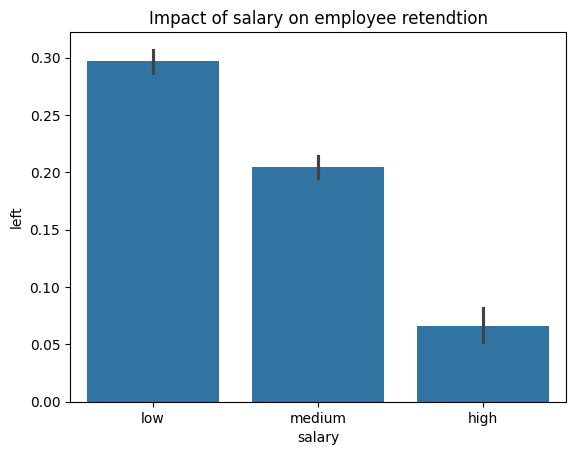

In [11]:
sns.barplot(data=df, x='salary', y='left')
plt.title('Impact of salary on employee retendtion')
plt.show()

<Axes: xlabel='salary'>

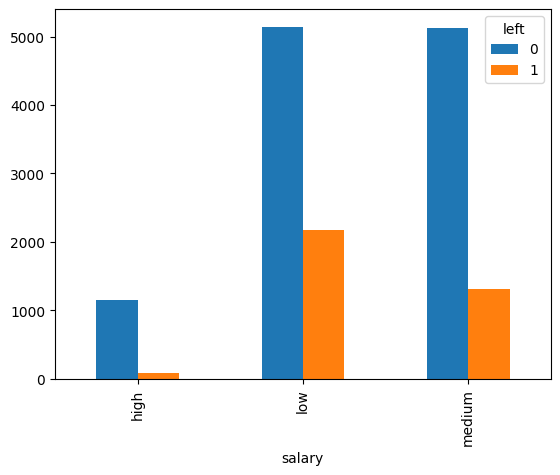

In [12]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

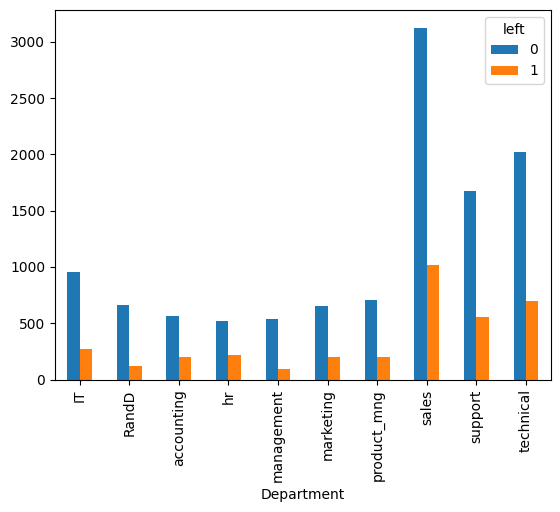

In [16]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From these visulaization we understand that employee salary level have higher impact on employee retention

In [18]:
subdf = df[['satisfaction_level', 'average_montly_hours',  'promotion_last_5years', 'salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [20]:
dummies = pd.get_dummies(subdf.salary, dtype = int)

In [21]:
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [24]:
merged = pd.concat([subdf, dummies], axis = 'columns')

In [26]:
final = merged.drop('salary', axis = 'columns')

In [27]:
X = final

In [28]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [29]:
y = df.left

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
model.predict(x_test)

array([0, 0, 0, ..., 1, 0, 0])

In [35]:
model.score(x_test,y_test)

0.7706666666666667